# EDA of external datasets, and additional ones

In [10]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df_ext = pd.read_csv("/Users/solalzana/Desktop/X/Python for Data Science/Final Project/bike_counters/external_data/external_data.csv")
df_ext

,numer_sta,date,pmer,tend,cod_tend,dd,ff,t,td,u,...,hnuage1,nnuage2,ctype2,hnuage2,nnuage3,ctype3,hnuage3,nnuage4,ctype4,hnuage4
0,7149,2021-01-01 00:00:00,100810,80,1,270,1.8,272.75,272.15,96,...,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7149,2021-01-01 03:00:00,100920,110,3,300,1.7,271.25,270.95,98,...,1500.0,2.0,3.0,3000.0,NaN,NaN,NaN,NaN,NaN,NaN
2,7149,2021-01-01 06:00:00,100950,30,3,290,2.6,271.95,271.65,98,...,480.0,4.0,6.0,2000.0,6.0,3.0,3000.0,NaN,NaN,NaN
3,7149,2021-01-01 09:00:00,101100,150,2,280,1.7,272.45,272.05,97,...,1740.0,3.0,3.0,2800.0,NaN,NaN,NaN,NaN,NaN,NaN
4,7149,2021-01-01 12:00:00,101110,30,0,50,1.0,276.95,274.15,82,...,330.0,4.0,6.0,570.0,7.0,6.0,810.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,7149,2020-09-30 09:00:00,101540,-30,8,230,4.4,289.95,286.85,82,...,400.0,7.0,6.0,2200.0,NaN,NaN,NaN,NaN,NaN,NaN
3318,7149,2020-09-30 12:00:00,101320,-210,8,190,4.9,292.05,285.55,66,...,870.0,7.0,6.0,1900.0,NaN,NaN,NaN,NaN,NaN,NaN
3319,7149,2020-09-30 15:00:00,101140,-180,7,190,4.1,291.55,286.45,72,...,820.0,7.0,6.0,2200.0,NaN,NaN,NaN,NaN,NaN,NaN
3320,7149,2020-09-30 18:00:00,101020,-130,6,190,2.7,290.15,285.25,73,...,2160.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Missing values

In [3]:
# Check for missing values
df_ext.isnull().sum()
# Better to check the proportion of missing values relative to the total nb of obs
df_ext.isnull().sum() / len(df_ext)

numer_sta    0.000000
date         0.000000
pmer         0.000000
tend         0.000000
cod_tend     0.000000
dd           0.000000
ff           0.000000
t            0.000000
td           0.000000
u            0.000000
vv           0.000000
ww           0.000000
w1           0.002107
w2           0.003010
n            0.046960
nbas         0.001505
hbas         0.136364
cl           0.124323
cm           0.415713
ch           0.494883
pres         0.000000
niv_bar      1.000000
geop         1.000000
tend24       0.003010
tn12         0.750151
tn24         1.000000
tx12         0.750151
tx24         1.000000
tminsol      0.999699
sw           1.000000
tw           1.000000
raf10        0.003010
rafper       0.000000
per          0.000000
etat_sol     0.015653
ht_neige     0.014750
ssfrai       0.133955
perssfrai    0.133955
rr1          0.002709
rr3          0.001806
rr6          0.004816
rr12         0.006623
rr24         0.007225
phenspe1     1.000000
phenspe2     1.000000
phenspe3  

Many columns have a ton of missing values, for that let's forget all those who have more than 10% of their values missing as they are not very reliable.

In [4]:
df_ext.drop(columns=df_ext.columns[(df_ext.isnull().sum()/len(df_ext)) >= 0.1], inplace=True)

In [5]:
df_ext.nunique()

numer_sta       1
date         3321
pmer          465
tend           99
cod_tend        9
dd             37
ff            109
t             345
td            281
u              77
vv           1230
ww             42
w1              9
w2              9
n              10
nbas           10
pres          459
tend24        353
raf10         170
rafper        186
per             1
etat_sol        9
ht_neige        7
rr1            33
rr3            64
rr6            91
rr12          124
rr24          164
dtype: int64

We see that there is numerous empty columns, and that `numer_sta`, `tminsol`, and `per` only have a unique value, so they are irrelevant. 

In [6]:
df_ext.drop(columns=df_ext.columns[df_ext.nunique()==0], inplace=True)
df_ext.drop(columns=["numer_sta", "per"], inplace=True)

In [7]:
df_ext

,date,pmer,tend,cod_tend,dd,ff,t,td,u,vv,...,tend24,raf10,rafper,etat_sol,ht_neige,rr1,rr3,rr6,rr12,rr24
0,2021-01-01 00:00:00,100810,80,1,270,1.8,272.75,272.15,96,990,...,470.0,2.5,2.5,1.0,0.00,0.0,0.0,0.0,0.0,2.0
1,2021-01-01 03:00:00,100920,110,3,300,1.7,271.25,270.95,98,210,...,750.0,2.2,2.2,1.0,0.00,0.0,0.0,0.0,0.0,1.2
2,2021-01-01 06:00:00,100950,30,3,290,2.6,271.95,271.65,98,3660,...,900.0,3.2,3.2,1.0,0.00,0.0,0.0,0.0,0.0,1.0
3,2021-01-01 09:00:00,101100,150,2,280,1.7,272.45,272.05,97,3500,...,860.0,2.3,2.3,13.0,0.01,0.0,0.2,0.2,0.2,0.2
4,2021-01-01 12:00:00,101110,30,0,50,1.0,276.95,274.15,82,8000,...,790.0,2.5,4.4,11.0,-0.01,0.0,0.0,0.2,0.2,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,2020-09-30 09:00:00,101540,-30,8,230,4.4,289.95,286.85,82,18000,...,-330.0,7.1,7.1,0.0,0.00,0.0,0.0,0.0,0.0,2.2
3318,2020-09-30 12:00:00,101320,-210,8,190,4.9,292.05,285.55,66,25000,...,-560.0,7.2,7.2,0.0,0.00,0.0,0.2,0.2,0.2,1.6
3319,2020-09-30 15:00:00,101140,-180,7,190,4.1,291.55,286.45,72,25000,...,-650.0,6.4,8.4,0.0,0.00,0.0,0.0,0.2,0.2,0.2
3320,2020-09-30 18:00:00,101020,-130,6,190,2.7,290.15,285.25,73,40820,...,-790.0,4.3,5.2,0.0,0.00,0.0,0.0,0.0,0.2,0.2


#### Multi-colinearity

<function matplotlib.pyplot.show(close=None, block=None)>

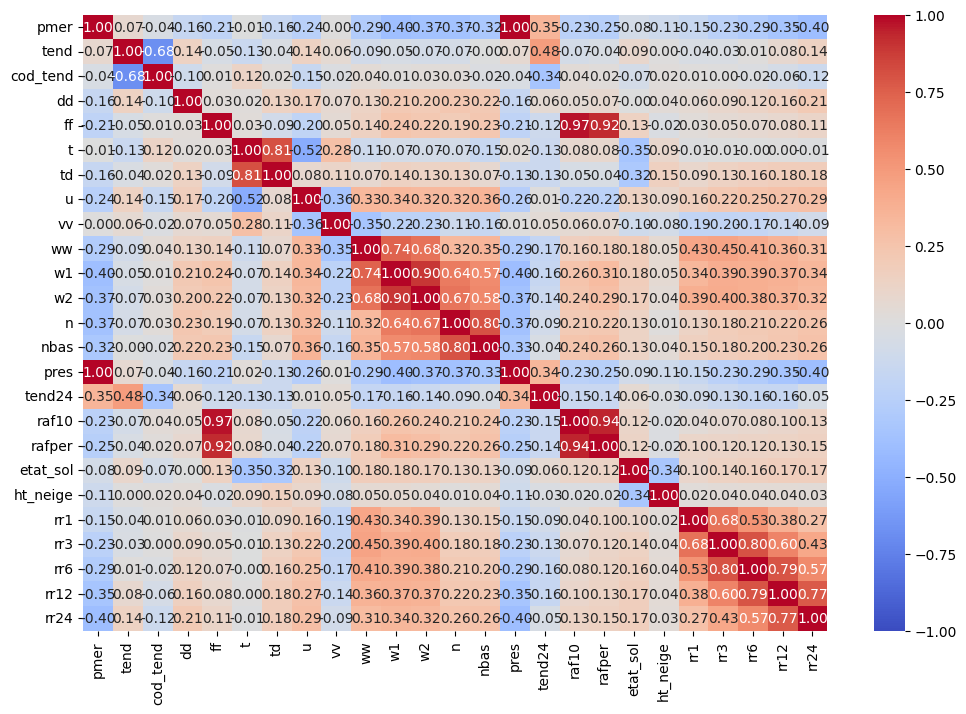

In [ ]:
external_data_without_date = df_ext.drop(columns=['date'])
correlation_matrix = external_data_without_date.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.show

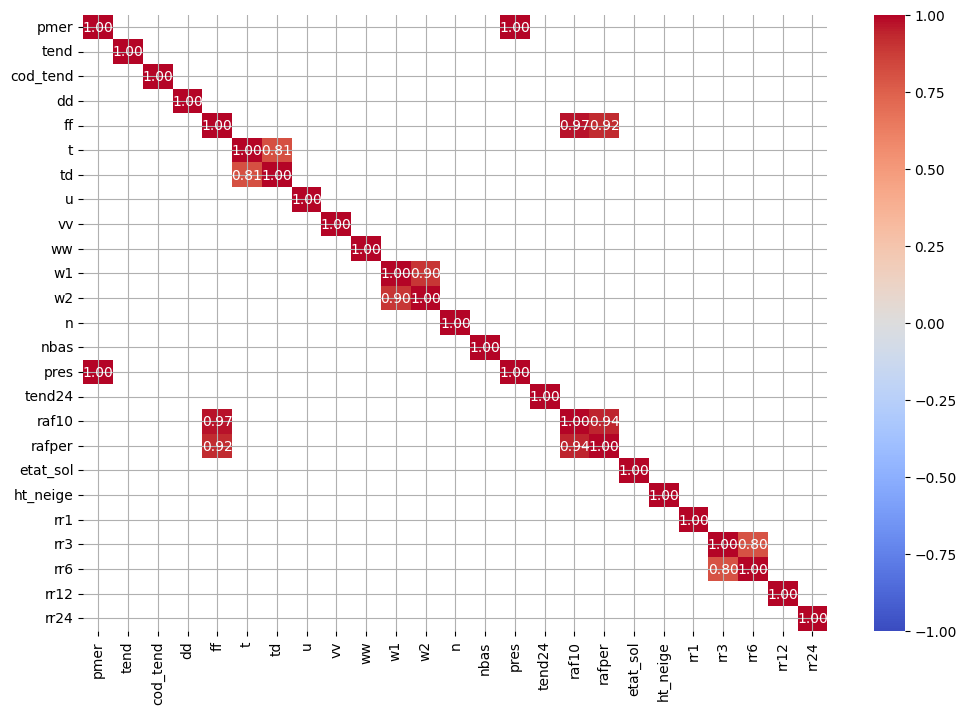

In [30]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[correlation_matrix.abs()>=0.8], annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.grid(True)

`pmer` and `pres` have a correlation of 1: we can keep one of both without losing any variance.
We can say the same for `raf10`and `rafper` and keep only windspeed `ff`. Following that logic we also drop `td` and `w2`.

In [33]:
df_ext.drop(columns=["pres", "raf10", "rafper", "td", "w2"], inplace=True)

# NOW ADD EXTERNAL DATA (VACANCES, TRAVAUX & COVID)

In [32]:
!pip install vacances-scolaires-france
!pip install jours_feries_france
!pip install chantiers-a-paris-copie1

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement chantiers-a-paris-copie1 (from versions: none)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
ERROR: No matching distribution found for chantiers-a-paris-copie1


In [ ]:
from vacances_scolaires_france import SchoolHolidayDates
from jours_feries_france import JoursFeries

df_ext["school_holidays"] = df_ext.apply(
    lambda row: SchoolHolidayDates().is_holiday(row["date"]), axis=1

AttributeError: 'SchoolHolidayDates' object has no attribute 'head'